# Notebook generating plots for NeurIPS paper

### Imports

In [11]:
import os
import glob
from tqdm import tqdm
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import nistats
import scipy
import nibabel as nib
import nilearn
from nilearn.image import load_img, mean_img, index_img, threshold_img, math_img, smooth_img, new_img_like
from nilearn.input_data import NiftiMapsMasker, NiftiMasker, NiftiLabelsMasker, MultiNiftiMasker
from nilearn.regions import RegionExtractor
from nistats.second_level_model import SecondLevelModel
from nistats.thresholding import map_threshold
from nilearn import plotting
from nilearn import datasets
from scipy.stats import norm
from nilearn.surface import vol_to_surf

In [12]:
from logger import Logger
from utils import read_yaml, check_folder, fetch_masker, possible_subjects_id, get_subject_name
import reporting
from linguistics_info import load_surnames, load_syntactic_roi, load_language_roi

### Defining variables

In [3]:
language = 'english'

In [4]:
PROJECT_PATH = f"/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/"
OUTPUT_PATH = f"/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/{language}"
INPUT_PATH = f"/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{language}"
FMRIDATA_PATH = f"/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/fMRI/{language}"
MASKER_PATH = f"/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/global_masker_{language}"
SMOOTHED_MASKER_PATH = f"/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/smoothed_global_masker_{language}"

Fetch a masker fitted on all subjects data and the following characterisctics:
- detrend: true
- dtype: null
- high_pass: null
- low_pass: null
- mask_strategy: background
- memory_level: 0
- n_jobs: 1
- smoothing_fwhm: null # try with 6 next time
- standardize: true
- t_r: null
- verbose: 0

In [5]:
logger = Logger(os.path.join(PROJECT_PATH, 'logs.txt'))

In [6]:
masker = reporting.fetch_masker(MASKER_PATH, language, FMRIDATA_PATH, INPUT_PATH, smoothing_fwhm=None, logger=logger)

In [7]:
atlas_maps, labels = reporting.load_atlas() # load harvard-oxford atlas named'cort-prob-2mm'
x_labels = labels[1:]

## Group level analysis

In [8]:
model_names = [
    'glove_300_{}',
    'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_{}_all-hidden-layers',
    'gpt2_scaled_{}_all-hidden-layers_pca_300',
    'bert-base-cased_{}_all-hidden-layers_pca_300',
    'BF_rms_{}',
    'BF_log_frequency_{}',
    'BF_wordrate_{}',
    'BF_content_words_{}',
    'BF_function_words_{}',
    'BF_word_position_{}'
]

Loading data:

In [9]:
data_full = reporting.get_model_data(model_names, language, OUTPUT_PATH)

 31%|███▏      | 16/51 [00:00<00:00, 49.09it/s]

sub-057 - 1 - 1
sub-058 - 1 - 1
sub-059 - 1 - 1
sub-061 - 1 - 1
sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1
sub-065 - 1 - 1
sub-066 - 1 - 1
sub-067 - 1 - 1
sub-068 - 1 - 1
sub-069 - 1 - 1
sub-070 - 1 - 1
sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1


 51%|█████     | 26/51 [00:00<00:00, 53.57it/s]

sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1
sub-086 - 1 - 1
sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1


 76%|███████▋  | 39/51 [00:00<00:00, 52.76it/s]

sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1
sub-096 - 1 - 1
sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1
sub-101 - 1 - 1
sub-103 - 1 - 1
sub-104 - 1 - 1


 88%|████████▊ | 45/51 [00:00<00:00, 34.08it/s]

sub-105 - 1 - 1
sub-106 - 1 - 1
sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1


  0%|          | 0/51 [00:00<?, ?it/s]

sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1
sub-059 - 1 - 1


 16%|█▌        | 8/51 [00:00<00:01, 32.52it/s]

sub-061 - 1 - 1
sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1
sub-065 - 1 - 1
sub-066 - 1 - 1
sub-067 - 1 - 1


 31%|███▏      | 16/51 [00:00<00:01, 29.87it/s]

sub-068 - 1 - 1
sub-069 - 1 - 1
sub-070 - 1 - 1
sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1
sub-075 - 1 - 1


 41%|████      | 21/51 [00:00<00:00, 32.56it/s]

sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1


 59%|█████▉    | 30/51 [00:00<00:00, 30.72it/s]

sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1
sub-086 - 1 - 1
sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1
sub-092 - 1 - 1


 67%|██████▋   | 34/51 [00:01<00:00, 26.32it/s]

sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1
sub-096 - 1 - 1


 78%|███████▊  | 40/51 [00:01<00:00, 22.96it/s]

sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1
sub-101 - 1 - 1


 90%|█████████ | 46/51 [00:01<00:00, 24.71it/s]

sub-103 - 1 - 1
sub-104 - 1 - 1
sub-105 - 1 - 1
sub-106 - 1 - 1
sub-108 - 1 - 1
sub-109 - 1 - 1


  0%|          | 0/51 [00:00<?, ?it/s]

sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1


 24%|██▎       | 12/51 [00:00<00:00, 44.05it/s]

sub-059 - 1 - 1
sub-061 - 1 - 1
sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1
sub-065 - 1 - 1
sub-066 - 1 - 1
sub-067 - 1 - 1
sub-068 - 1 - 1
sub-069 - 1 - 1
sub-070 - 1 - 1
sub-072 - 1 - 1


 37%|███▋      | 19/51 [00:00<00:00, 33.14it/s]

sub-073 - 1 - 1
sub-074 - 1 - 1
sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1


 49%|████▉     | 25/51 [00:00<00:00, 30.75it/s]

sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1


 65%|██████▍   | 33/51 [00:00<00:00, 33.85it/s]

sub-086 - 1 - 1
sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1
sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1


 80%|████████  | 41/51 [00:01<00:00, 33.61it/s]

sub-095 - 1 - 1
sub-096 - 1 - 1
sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1
sub-101 - 1 - 1
sub-103 - 1 - 1
sub-104 - 1 - 1


  0%|          | 0/51 [00:00<?, ?it/s]

sub-105 - 1 - 1
sub-106 - 1 - 1
sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1
sub-059 - 1 - 1
sub-061 - 1 - 1
sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1
sub-065 - 1 - 1
sub-066 - 1 - 1
sub-067 - 1 - 1
sub-068 - 1 - 1
sub-069 - 1 - 1
sub-070 - 1 - 1
sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1
sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1
sub-086 - 1 - 1
sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1
sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1
sub-096 - 1 - 1
sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1
sub-101 - 1 - 1
sub-103 - 1 - 1
sub-104 - 1 - 1
sub-105 - 1 - 1
sub-106 - 1 - 1
sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1
sub-057 - 1 - 1


 18%|█▊        | 9/51 [00:00<00:01, 35.13it/s]

sub-058 - 1 - 1
sub-059 - 1 - 1
sub-061 - 1 - 1
sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1
sub-065 - 1 - 1
sub-066 - 1 - 1


 73%|███████▎  | 37/51 [00:00<00:00, 52.57it/s]

sub-067 - 1 - 1
sub-068 - 1 - 1
sub-069 - 1 - 1
sub-070 - 1 - 1
sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1
sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1
sub-086 - 1 - 1
sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1
sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1
sub-096 - 1 - 1
sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1
sub-101 - 1 - 1
sub-103 - 1 - 1


 76%|███████▋  | 39/51 [00:00<00:00, 364.99it/s]

sub-104 - 1 - 1
sub-105 - 1 - 1
sub-106 - 1 - 1
sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1
sub-059 - 1 - 1
sub-061 - 1 - 1
sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1
sub-065 - 1 - 1
sub-066 - 1 - 1
sub-067 - 1 - 1
sub-068 - 1 - 1
sub-069 - 1 - 1
sub-070 - 1 - 1
sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1
sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1
sub-086 - 1 - 1
sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1
sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1
sub-096 - 1 - 1
sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1
sub-101 - 1 - 1
sub-103 - 1 - 1


  0%|          | 0/51 [00:00<?, ?it/s]

sub-104 - 1 - 1
sub-105 - 1 - 1
sub-106 - 1 - 1
sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1


 29%|██▉       | 15/51 [00:00<00:01, 32.12it/s]

sub-059 - 1 - 1
sub-061 - 1 - 1
sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1
sub-065 - 1 - 1
sub-066 - 1 - 1
sub-067 - 1 - 1
sub-068 - 1 - 1
sub-069 - 1 - 1
sub-070 - 1 - 1
sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1
sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1


 63%|██████▎   | 32/51 [00:00<00:00, 45.45it/s]

sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1
sub-086 - 1 - 1
sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1
sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1
sub-096 - 1 - 1
sub-097 - 1 - 1


  0%|          | 0/51 [00:00<?, ?it/s]

sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1
sub-101 - 1 - 1
sub-103 - 1 - 1
sub-104 - 1 - 1
sub-105 - 1 - 1
sub-106 - 1 - 1
sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1
sub-059 - 1 - 1
sub-061 - 1 - 1


 16%|█▌        | 8/51 [00:00<00:01, 36.12it/s]

sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1
sub-065 - 1 - 1
sub-066 - 1 - 1
sub-067 - 1 - 1


 45%|████▌     | 23/51 [00:00<00:00, 47.54it/s]

sub-068 - 1 - 1
sub-069 - 1 - 1
sub-070 - 1 - 1
sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1
sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1
sub-086 - 1 - 1
sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1


 84%|████████▍ | 43/51 [00:00<00:00, 58.55it/s]

sub-091 - 1 - 1
sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1
sub-096 - 1 - 1
sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1
sub-101 - 1 - 1
sub-103 - 1 - 1
sub-104 - 1 - 1
sub-105 - 1 - 1
sub-106 - 1 - 1
sub-108 - 1 - 1


  0%|          | 0/51 [00:00<?, ?it/s]

sub-109 - 1 - 1
sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1
sub-059 - 1 - 1
sub-061 - 1 - 1


 18%|█▊        | 9/51 [00:00<00:01, 34.51it/s]

sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1
sub-065 - 1 - 1
sub-066 - 1 - 1
sub-067 - 1 - 1
sub-068 - 1 - 1
sub-069 - 1 - 1
sub-070 - 1 - 1
sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1
sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1


 65%|██████▍   | 33/51 [00:00<00:00, 45.10it/s]

sub-086 - 1 - 1
sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1
sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1


 16%|█▌        | 8/51 [00:00<00:00, 69.24it/s]

sub-095 - 1 - 1
sub-096 - 1 - 1
sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1
sub-101 - 1 - 1
sub-103 - 1 - 1
sub-104 - 1 - 1
sub-105 - 1 - 1
sub-106 - 1 - 1
sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1
sub-059 - 1 - 1
sub-061 - 1 - 1
sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1
sub-065 - 1 - 1
sub-066 - 1 - 1
sub-067 - 1 - 1


 35%|███▌      | 18/51 [00:00<00:00, 52.99it/s]

sub-068 - 1 - 1
sub-069 - 1 - 1
sub-070 - 1 - 1
sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1
sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1


 75%|███████▍  | 38/51 [00:00<00:00, 68.97it/s]

sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1
sub-086 - 1 - 1
sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1
sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1
sub-096 - 1 - 1
sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1
sub-101 - 1 - 1
sub-103 - 1 - 1
sub-104 - 1 - 1
sub-105 - 1 - 1
sub-106 - 1 - 1


100%|██████████| 51/51 [00:00<00:00, 81.05it/s]

sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1


Checking if we have all the data:

In [10]:
reporting.check_data(data_full, 51)

Computing group level maps: (already computed)

In [32]:
#reporting.compute_t_test_for_model_comparison(
#                                        data_full, 
#                                        smoothing_fwhm=6, 
#                                        language='english',
#                                        vmax=None,
#                                        PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
#                                        )

#####  glove_300_R2  #####
#####  glove_300_Pearson_coeff  #####
#####  LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers_R2  #####
#####  LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers_Pearson_coeff  #####
#####  gpt2_scaled_all-hidden-layers_pca_300_R2  #####
#####  gpt2_scaled_all-hidden-layers_pca_300_Pearson_coeff  #####
#####  bert-base-cased_all-hidden-layers_pca_300_R2  #####
#####  bert-base-cased_all-hidden-layers_pca_300_Pearson_coeff  #####
#####  BF_rms_R2  #####
#####  BF_rms_Pearson_coeff  #####
#####  BF_log_frequency_R2  #####
#####  BF_log_frequency_Pearson_coeff  #####
#####  BF_wordrate_R2  #####
#####  BF_wordrate_Pearson_coeff  #####
#####  BF_content_words_R2  #####
#####  BF_content_words_Pearson_coeff  #####
#####  BF_function_words_R2  #####
#####  BF_function_words_Pearson_coeff  #####
#####  BF_word_position_R2  #####
#####  BF_word_position_Pearson_coeff  #####


#### Surface plots of group level analysis

In [13]:
paths_group_level = {}
for model_name in model_names:
    name = model_name.replace('_{}', '')
    path = os.path.join(PROJECT_PATH, 'derivatives/fMRI/analysis/{}/{}'.format(language, name))
    paths_group_level[name] = reporting.fetch_map(path, 'R2_group_fdr_effect')[0]

In [14]:
kwargs = {
    'surf_mesh': 'pial_left', # pial_right, infl_left, infl_right
    'surf_mesh_type': 'pial_left',
    'hemi':'left', # right
    'view':'lateral', # medial
    'bg_map': 'sulc_left', # sulc_right
    'bg_on_data':True,
    'darkness':.5
}

########## glove_300 ##########


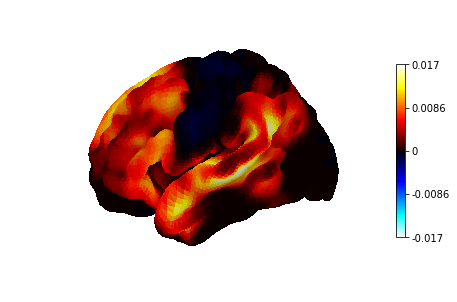

########## LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers ##########


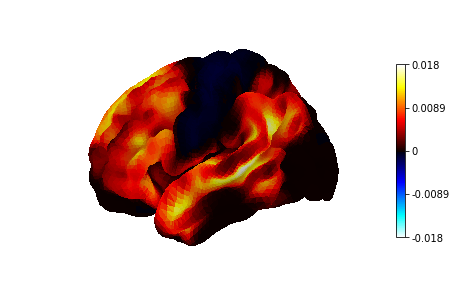

########## gpt2_scaled_all-hidden-layers_pca_300 ##########


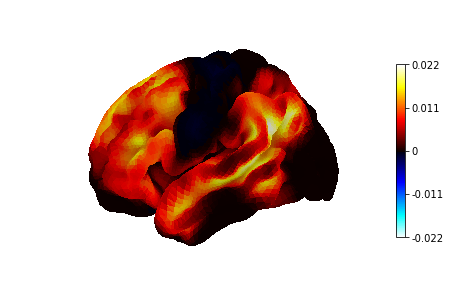

########## bert-base-cased_all-hidden-layers_pca_300 ##########


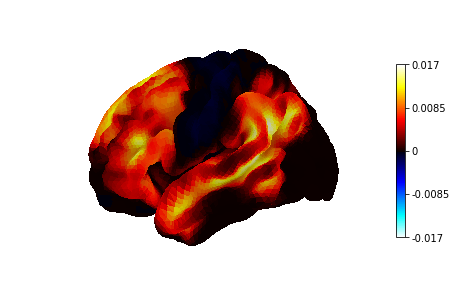

########## BF_rms ##########


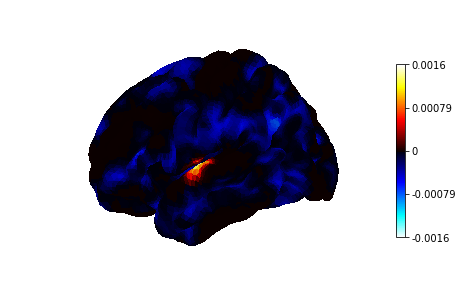

########## BF_log_frequency ##########


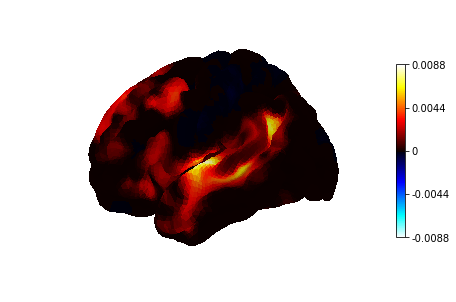

########## BF_wordrate ##########


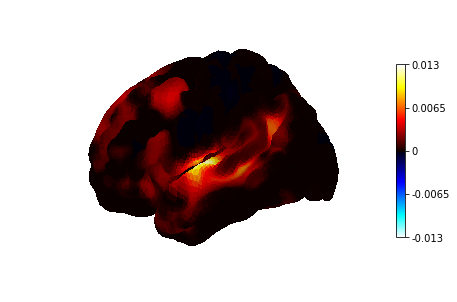

########## BF_content_words ##########


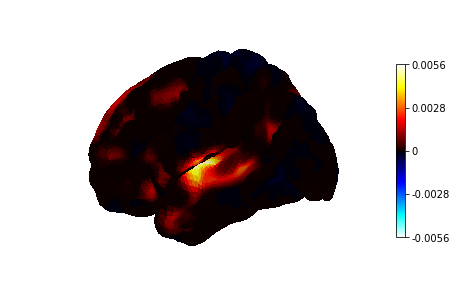

########## BF_function_words ##########


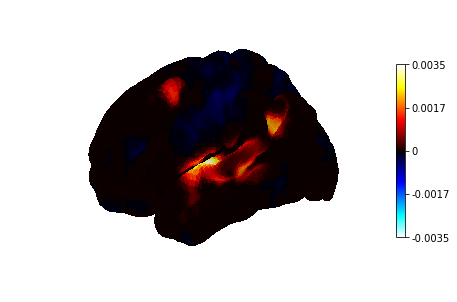

########## BF_word_position ##########


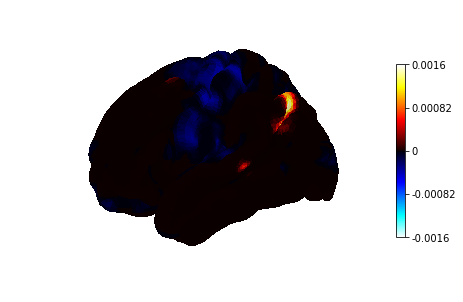

In [17]:
for index_model, model_name in enumerate(model_names):
    name = model_name.replace('_{}', '')
    print("#"*10, name, "#"*10)
    #saving_path = os.path.dirname(paths_group_level[index_model])
    reporting.plot_img_surf(paths_group_level[name], saving_path=None, plot_name=model_name+'_surf', inflated=False, **kwargs)

## Model Comparison (GloVe - LSTM - GPT2 - BERT)

In [15]:
model_names = [
    'glove_300_{}',
    'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_{}_all-hidden-layers',
    'gpt2_scaled_{}_all-hidden-layers_pca_300',
    'bert-base-cased_{}_all-hidden-layers_pca_300'
]

legend_names = ['GloVe', 
                'LSTM-E600-H300-L1', 
                'GPT2_scaled-Hpca', 
                'BERT-Hpca'
               ]

In [16]:
data_model_comparison = { key.replace('_{}', ''): data_full[key.replace('_{}', '')] for key in model_names }

Preparing data for plot per ROI:

In [17]:
data_prep_vertical = reporting.get_data_per_roi(
                                data_model_comparison, 
                                atlas_maps,
                                labels,
                                analysis=None, 
                                language='english', 
                                PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                )

  0%|          | 0/48 [00:00<?, ?it/s]

	Looping through labeled masks...


100%|██████████| 48/48 [00:15<00:00,  3.06it/s]

		-->Done


In [18]:
mean = data_prep_vertical['mean']
third_quartile = data_prep_vertical['third_quartile']
maximum = data_prep_vertical['maximum']

### Vertical plots per ROI

/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/code/fMRI/reporting.py:321: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


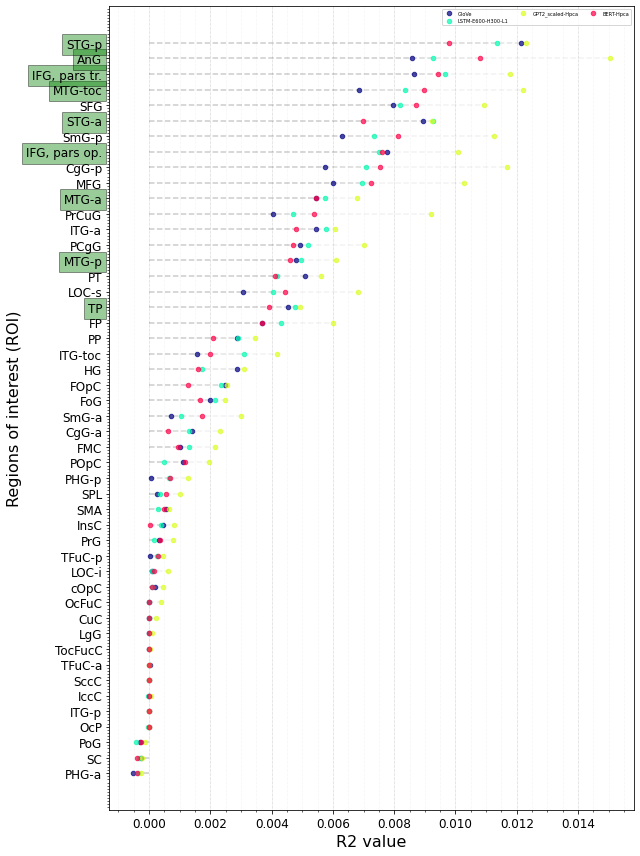

In [19]:
reporting.vertical_plot(
                mean, 
                x_labels, 
                'Mean_R2_per_ROI',
                save_folder=None, 
                object_of_interest='R2', 
                surnames=load_surnames(),
                legend_names=legend_names, 
                syntactic_roi=load_syntactic_roi(), 
                language_roi=load_language_roi(), 
                figsize=(9,12), 
                count=False, 
                title=None, 
                ylabel='Regions of interest (ROI)', 
                xlabel='R2 value', 
                model_name='Model_comparison'
                )

/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/code/fMRI/reporting.py:321: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


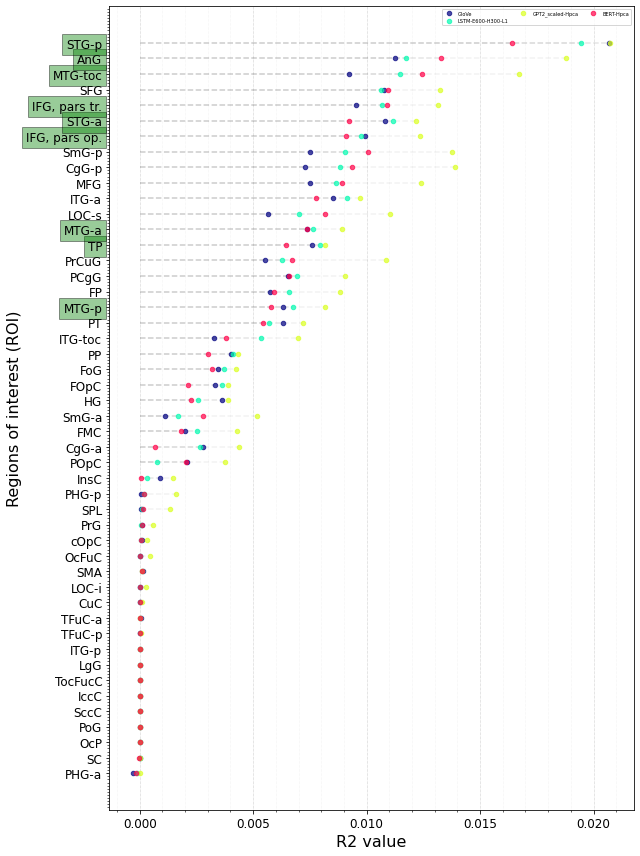

In [20]:
reporting.vertical_plot(
                third_quartile, 
                x_labels, 
                'Third_Quartile_R2_per_ROI',
                save_folder=None, 
                object_of_interest='R2', 
                surnames=load_surnames(),
                legend_names=legend_names, 
                syntactic_roi=load_syntactic_roi(), 
                language_roi=load_language_roi(), 
                figsize=(9,12), 
                count=False, 
                title=None, 
                ylabel='Regions of interest (ROI)', 
                xlabel='R2 value', 
                model_name='Model_comparison'
                )

/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/code/fMRI/reporting.py:321: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


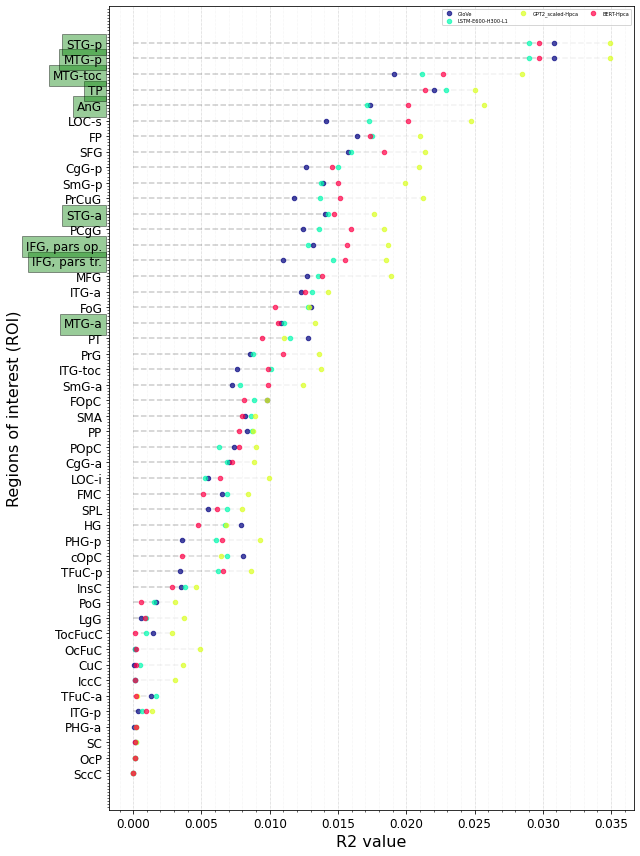

In [21]:
reporting.vertical_plot(
                maximum, 
                x_labels, 
                'Max_R2_per_ROI',
                save_folder=None, 
                object_of_interest='R2', 
                surnames=load_surnames(),
                legend_names=legend_names, 
                syntactic_roi=load_syntactic_roi(), 
                language_roi=load_language_roi(), 
                figsize=(9,12), 
                count=False, 
                title=None, 
                ylabel='Regions of interest (ROI)', 
                xlabel='R2 value', 
                model_name='Model_comparison'
                )

### Surface plots

#### Surface plots showing which model predicts better (voxel-wise)

In [17]:
model_names = [
    'glove_300',
    'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers',
    'gpt2_scaled_all-hidden-layers_pca_300',
    'bert-base-cased_all-hidden-layers_pca_300'
]

In [18]:
kwargs = {
    'surf_mesh': 'pial_left', # pial_right, infl_left, infl_right
    'surf_mesh_type': 'pial_left',
    'hemi':'left', # right
    'view':'lateral', # medial
    'bg_map': 'sulc_left', # sulc_right
    'bg_on_data':True,
    'darkness':.5
}

In [19]:
from nilearn.plotting import plot_surf_roi
from nilearn.surface import vol_to_surf

def get_voxel_wise_max_img_on_surf(
    masker, 
    model_names, 
    language='english', 
    PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/',
    **kwargs
    ):
    maps = []
    fsaverage = datasets.fetch_surf_fsaverage()
    for model_name in model_names:
        path = os.path.join(PROJECT_PATH, 'derivatives/fMRI/analysis/{}/{}'.format(language, model_name))
        name = 'R2_group_fdr_effect'
        maps.append(reporting.fetch_map(path, name)[0])
    
    arrays = [vol_to_surf(map_, fsaverage[kwargs['surf_mesh']]) for map_ in maps]
    print(maps[0])

    #arrays = [masker.transform(map_) for map_ in maps]
    data_tmp = np.vstack(arrays)
    img = np.argmax(data_tmp, axis=0)

    #img = masker.inverse_transform(data_tmp)
    return img, data_tmp

In [20]:
img = reporting.get_voxel_wise_max_img_on_surf(
                            masker, 
                            model_names, 
                            language='english', 
                            PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/',
                            **kwargs
                            )

In [21]:
# saving_path = 

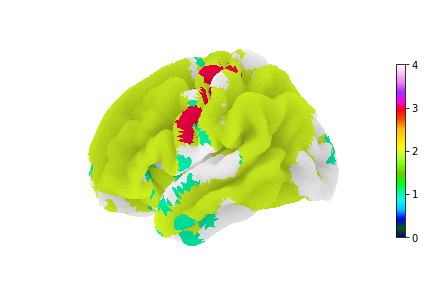

In [22]:
reporting.plot_roi_img_surf(img, saving_path=None, plot_name='model_comparison_surf', inflated=False, compute_surf=False, **kwargs)

In [23]:
view = reporting.interactive_surf_plot(img, inflated=False, **kwargs)
view

TypeError: Data given cannot be loaded because it is not compatible with nibabel format:
2

#### Surface plots of group-level difference analysis maps

In [24]:
comparisons = {
    'LSTM_300-H_vs_Glove' : ['LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers', 'glove_300'],
    'BERT-Hpca_vs_GPT2-scaled-Hpca' : ['bert-base-cased_all-hidden-layers_pca_300', 'gpt2_scaled_all-hidden-layers_pca_300'],
    'BERT-Hpca_vs_LSTM_300-H' : ['bert-base-cased_all-hidden-layers_pca_300', 'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers'],
    'GPT2-scaled-Hpca_vs_LSTM_300-H' : ['gpt2_scaled_all-hidden-layers_pca_300', 'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers'],
    'BERT-Hpca_vs_Glove' : ['bert-base-cased_all-hidden-layers_pca_300', 'glove_300'],
    'GPT2-scaled-Hpca_vs_Glove' : ['gpt2_scaled_all-hidden-layers_pca_300', 'glove_300']   
}

In [52]:
for comparison in comparisons:
    imgs_1 = data_full[comparisons[comparison][0]]['R2']
    imgs_2 = data_full[comparisons[comparison][1]]['R2']
    
    names = comparison.split('_vs_')

    reporting.compute_model_contrasts_t_test(
                                    imgs_1,
                                    imgs_2,
                                    names[0], 
                                    names[1], 
                                    analysis_name='',
                                    observed_data='R2',
                                    language='english',
                                    smoothing_fwhm=6,
                                    PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                    )

#####  LSTM_300-H-vs-Glove__R2  #####
#####  BERT-Hpca-vs-GPT2-scaled-Hpca__R2  #####
#####  BERT-Hpca-vs-LSTM_300-H__R2  #####
#####  GPT2-scaled-Hpca-vs-LSTM_300-H__R2  #####
#####  BERT-Hpca-vs-Glove__R2  #####
#####  GPT2-scaled-Hpca-vs-Glove__R2  #####


In [25]:
paths = {}
for comparison in comparisons:
    names = comparison.split('_vs_')
    name = '{}-vs-{}_{}'.format(names[0], names[1], '')
    path = os.path.join(PROJECT_PATH, 'derivatives/fMRI/analysis/{}/{}'.format(language, name))
    paths[comparison] = reporting.fetch_map(path, 'R2_group_fdr_effect')[0]

In [26]:
kwargs = {
    'surf_mesh': 'pial_left', # pial_right, infl_left, infl_right
    'surf_mesh_type': 'pial_left',
    'hemi':'left', # right
    'view':'lateral', # medial
    'bg_map': 'sulc_left', # sulc_right
    'bg_on_data':True,
    'darkness':.5
}

########## LSTM_300-H_vs_Glove ##########


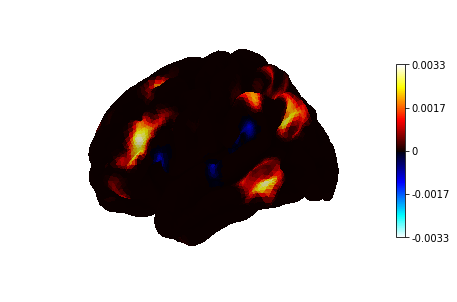

########## BERT-Hpca_vs_GPT2-scaled-Hpca ##########


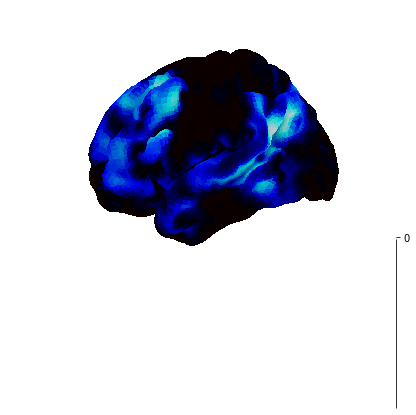

########## BERT-Hpca_vs_LSTM_300-H ##########


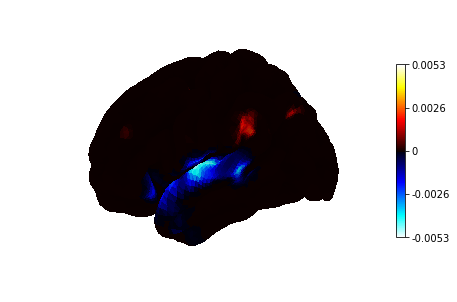

########## GPT2-scaled-Hpca_vs_LSTM_300-H ##########


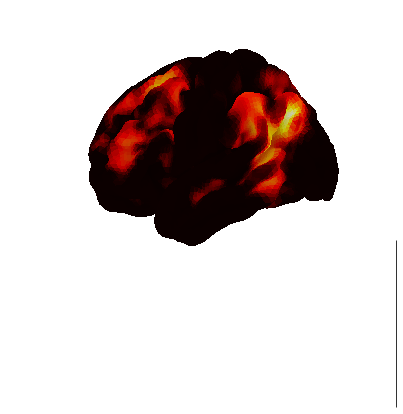

########## BERT-Hpca_vs_Glove ##########


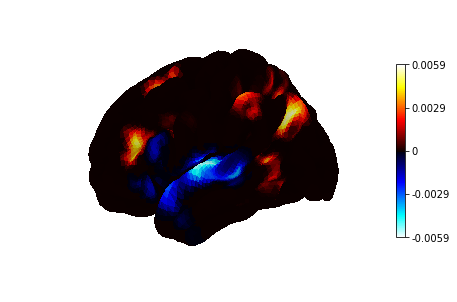

########## GPT2-scaled-Hpca_vs_Glove ##########


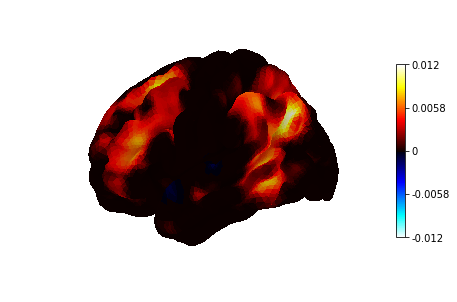

In [34]:
for index_comp, comparison in enumerate(comparisons):
    saving_path = os.path.dirname(paths[comparison])
    print("#"*10, comparison, "#"*10)
    reporting.plot_img_surf(paths[comparison], saving_path=None, plot_name=comparison+'_surf', inflated=False, **kwargs)

## LSTM gates analysis

In [35]:
lstm_names = [
    'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_{}_all-out-layers',
    'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_{}_all-in-layers',
    'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_{}_all-hidden-layers',
    'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_{}_all-forget-layers',
    'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_{}_all-c_tilde-layers',
    'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_{}_all-cell-layers'
]

lstm_legends = ['LSTM-E600-O300-L1', 
                'LSTM-E600-I300-L1', 
                'LSTM-E600-H300-L1',
                'LSTM-E600-F300-L1',
                'LSTM-E600-CT300-L1',
                'LSTM-E600-C300-L1'
               ]

Retrieving data and computing group level analysis:

In [36]:
data_lstm_gates = reporting.get_model_data(lstm_names, language, OUTPUT_PATH)
reporting.check_data(data_full, 51)
reporting.compute_t_test_for_model_comparison(
                                        data_lstm_gates, 
                                        smoothing_fwhm=6, 
                                        language='english',
                                        vmax=None,
                                        PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                        )

  4%|▍         | 2/51 [00:00<00:02, 19.86it/s]

sub-057 - 1 - 1
sub-058 - 1 - 1
sub-059 - 1 - 1
sub-061 - 1 - 1


 14%|█▎        | 7/51 [00:00<00:02, 18.46it/s]

sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1
sub-065 - 1 - 1


 25%|██▌       | 13/51 [00:00<00:01, 20.21it/s]

sub-066 - 1 - 1
sub-067 - 1 - 1
sub-068 - 1 - 1
sub-069 - 1 - 1
sub-070 - 1 - 1
sub-072 - 1 - 1


 35%|███▌      | 18/51 [00:00<00:01, 22.04it/s]

sub-073 - 1 - 1
sub-074 - 1 - 1
sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1


 49%|████▉     | 25/51 [00:01<00:01, 23.13it/s]

sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1
sub-086 - 1 - 1


 65%|██████▍   | 33/51 [00:01<00:00, 27.23it/s]

sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1
sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1


 82%|████████▏ | 42/51 [00:01<00:00, 31.66it/s]

sub-095 - 1 - 1
sub-096 - 1 - 1
sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1
sub-101 - 1 - 1
sub-103 - 1 - 1
sub-104 - 1 - 1


 90%|█████████ | 46/51 [00:01<00:00, 31.54it/s]

sub-105 - 1 - 1
sub-106 - 1 - 1
sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1
sub-113 - 1 - 1


 10%|▉         | 5/51 [00:00<00:00, 49.46it/s]

sub-114 - 1 - 1
sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1
sub-059 - 1 - 1
sub-061 - 1 - 1
sub-062 - 1 - 1
sub-063 - 1 - 1


 24%|██▎       | 12/51 [00:00<00:01, 36.22it/s]

sub-064 - 1 - 1
sub-065 - 1 - 1
sub-066 - 1 - 1
sub-067 - 1 - 1
sub-068 - 1 - 1
sub-069 - 1 - 1


 43%|████▎     | 22/51 [00:00<00:00, 38.18it/s]

sub-070 - 1 - 1
sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1
sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1


 53%|█████▎    | 27/51 [00:00<00:00, 40.91it/s]

sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1
sub-086 - 1 - 1
sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1


 71%|███████   | 36/51 [00:00<00:00, 36.59it/s]

sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1
sub-096 - 1 - 1
sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1


 86%|████████▋ | 44/51 [00:01<00:00, 29.56it/s]

sub-100 - 1 - 1
sub-101 - 1 - 1
sub-103 - 1 - 1
sub-104 - 1 - 1
sub-105 - 1 - 1


  0%|          | 0/51 [00:00<?, ?it/s]

sub-106 - 1 - 1
sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1
sub-059 - 1 - 1
sub-061 - 1 - 1
sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1
sub-065 - 1 - 1
sub-066 - 1 - 1
sub-067 - 1 - 1
sub-068 - 1 - 1
sub-069 - 1 - 1
sub-070 - 1 - 1
sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1
sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1
sub-086 - 1 - 1
sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1
sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1
sub-096 - 1 - 1
sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1
sub-101 - 1 - 1
sub-103 - 1 - 1
sub-104 - 1 - 1


 12%|█▏        | 6/51 [00:00<00:01, 42.99it/s]

sub-105 - 1 - 1
sub-106 - 1 - 1
sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1
sub-059 - 1 - 1
sub-061 - 1 - 1
sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1


 24%|██▎       | 12/51 [00:00<00:01, 30.38it/s]

sub-065 - 1 - 1
sub-066 - 1 - 1
sub-067 - 1 - 1
sub-068 - 1 - 1
sub-069 - 1 - 1
sub-070 - 1 - 1
sub-072 - 1 - 1
sub-073 - 1 - 1


 45%|████▌     | 23/51 [00:00<00:00, 37.44it/s]

sub-074 - 1 - 1
sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1


 63%|██████▎   | 32/51 [00:00<00:00, 37.48it/s]

sub-086 - 1 - 1
sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1
sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1


 80%|████████  | 41/51 [00:01<00:00, 39.03it/s]

sub-096 - 1 - 1
sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1
sub-101 - 1 - 1
sub-103 - 1 - 1


 98%|█████████▊| 50/51 [00:01<00:00, 34.67it/s]

sub-104 - 1 - 1
sub-105 - 1 - 1
sub-106 - 1 - 1
sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1


 10%|▉         | 5/51 [00:00<00:01, 39.07it/s]

sub-115 - 1 - 1
sub-057 - 1 - 1
sub-058 - 1 - 1
sub-059 - 1 - 1
sub-061 - 1 - 1
sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1
sub-065 - 1 - 1
sub-066 - 1 - 1


 22%|██▏       | 11/51 [00:00<00:01, 39.19it/s]

sub-067 - 1 - 1
sub-068 - 1 - 1
sub-069 - 1 - 1
sub-070 - 1 - 1


 35%|███▌      | 18/51 [00:00<00:01, 32.87it/s]

sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1
sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1


 49%|████▉     | 25/51 [00:00<00:00, 30.18it/s]

sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1
sub-083 - 1 - 1
sub-084 - 1 - 1
sub-086 - 1 - 1


 63%|██████▎   | 32/51 [00:01<00:00, 30.43it/s]

sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1
sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1


 82%|████████▏ | 42/51 [00:01<00:00, 37.03it/s]

sub-096 - 1 - 1
sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1
sub-101 - 1 - 1
sub-103 - 1 - 1
sub-104 - 1 - 1
sub-105 - 1 - 1
sub-106 - 1 - 1


  0%|          | 0/51 [00:00<?, ?it/s]

sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1
sub-057 - 1 - 1


 22%|██▏       | 11/51 [00:00<00:00, 51.62it/s]

sub-058 - 1 - 1
sub-059 - 1 - 1
sub-061 - 1 - 1
sub-062 - 1 - 1
sub-063 - 1 - 1
sub-064 - 1 - 1
sub-065 - 1 - 1
sub-066 - 1 - 1
sub-067 - 1 - 1
sub-068 - 1 - 1
sub-069 - 1 - 1
sub-070 - 1 - 1


 39%|███▉      | 20/51 [00:00<00:00, 55.92it/s]

sub-072 - 1 - 1
sub-073 - 1 - 1
sub-074 - 1 - 1
sub-075 - 1 - 1
sub-076 - 1 - 1
sub-077 - 1 - 1
sub-078 - 1 - 1
sub-079 - 1 - 1
sub-080 - 1 - 1
sub-081 - 1 - 1
sub-082 - 1 - 1
sub-083 - 1 - 1


 65%|██████▍   | 33/51 [00:00<00:00, 58.86it/s]

sub-084 - 1 - 1
sub-086 - 1 - 1
sub-087 - 1 - 1
sub-088 - 1 - 1
sub-089 - 1 - 1
sub-091 - 1 - 1
sub-092 - 1 - 1
sub-093 - 1 - 1
sub-094 - 1 - 1
sub-095 - 1 - 1
sub-096 - 1 - 1


 86%|████████▋ | 44/51 [00:00<00:00, 42.63it/s]

sub-097 - 1 - 1
sub-098 - 1 - 1
sub-099 - 1 - 1
sub-100 - 1 - 1
sub-101 - 1 - 1
sub-103 - 1 - 1
sub-104 - 1 - 1
sub-105 - 1 - 1


100%|██████████| 51/51 [00:01<00:00, 50.76it/s]


sub-106 - 1 - 1
sub-108 - 1 - 1
sub-109 - 1 - 1
sub-110 - 1 - 1
sub-113 - 1 - 1
sub-114 - 1 - 1
sub-115 - 1 - 1
#####  LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-out-layers_R2  #####
#####  LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-out-layers_Pearson_coeff  #####
#####  LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-in-layers_R2  #####
#####  LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-in-layers_Pearson_coeff  #####
#####  LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers_R2  #####
#####  LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers_Pearson_coeff  #####
#####  LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-forget-layers_R2  #####
#####  LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-forge

In [37]:
data_lstm_vertical = reporting.get_data_per_roi(
                                data_lstm_gates, 
                                atlas_maps,
                                labels,
                                analysis=None, 
                                language='english', 
                                PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                )
mean_lstm = data_lstm_vertical['mean']
third_quartile_lstm = data_lstm_vertical['third_quartile']

  0%|          | 0/48 [00:00<?, ?it/s]

	Looping through labeled masks...


100%|██████████| 48/48 [00:31<00:00,  1.53it/s]

		-->Done


/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/code/fMRI/reporting.py:319: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


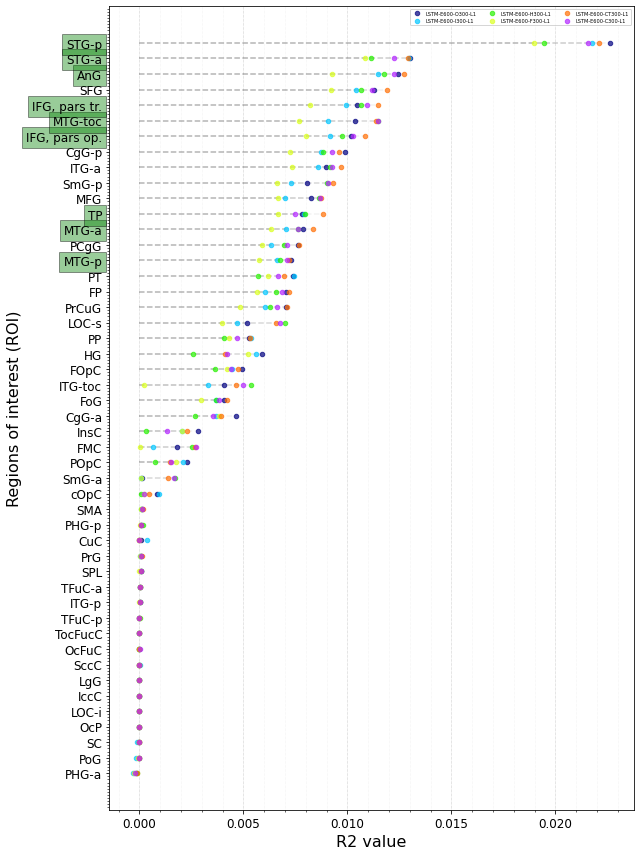

In [40]:
reporting.vertical_plot(
                third_quartile_lstm, 
                x_labels, 
                'Third_Quartile_R2_per_ROI',
                save_folder=None, 
                object_of_interest='R2', 
                surnames=load_surnames(),
                legend_names=lstm_legends, 
                syntactic_roi=load_syntactic_roi(), 
                language_roi=load_language_roi(), 
                figsize=(9,12), 
                count=False, 
                title=None, 
                ylabel='Regions of interest (ROI)', 
                xlabel='R2 value', 
                model_name='LSTM gates comparison'
                )

In [41]:
comparisons_lstm = {
    'LSTM-E600-H300-L1_vs_LSTM-E600-O300-L1' : ['LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers', 'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-out-layers'],
    'LSTM-E600-H300-L1_vs_LSTM-E600-I300-L1' : ['LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers', 'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-in-layers'],
    'LSTM-E600-H300-L1_vs_LSTM-E600-F300-L1' : ['LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers', 'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-forget-layers'],
    'LSTM-E600-H300-L1_vs_LSTM-E600-C300-L1' : ['LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers', 'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-cell-layers'],
    'LSTM-E600-H300-L1_vs_LSTM-E600-CT300-L1' : ['LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-hidden-layers', 'LSTM_embedding-size_600_nhid_300_nlayers_1_dropout_02_wiki_kristina_english_all-c_tilde-layers']
}
for comparison in comparisons_lstm:
    imgs_1 = data_lstm_gates[comparisons_lstm[comparison][0]]['R2']
    imgs_2 = data_lstm_gates[comparisons_lstm[comparison][1]]['R2']
    
    names = comparison.split('_vs_')

    reporting.compute_model_contrasts_t_test(
                                    imgs_1,
                                    imgs_2,
                                    names[0], 
                                    names[1], 
                                    analysis_name='',
                                    observed_data='R2',
                                    language='english',
                                    smoothing_fwhm=6,
                                    PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                    )

#####  LSTM-E600-H300-L1-vs-LSTM-E600-O300-L1__R2  #####
#####  LSTM-E600-H300-L1-vs-LSTM-E600-I300-L1__R2  #####
#####  LSTM-E600-H300-L1-vs-LSTM-E600-F300-L1__R2  #####
#####  LSTM-E600-H300-L1-vs-LSTM-E600-C300-L1__R2  #####
#####  LSTM-E600-H300-L1-vs-LSTM-E600-CT300-L1__R2  #####


In [42]:
paths_lstm = {}
for comparison in comparisons_lstm:
    names = comparison.split('_vs_')
    name = '{}-vs-{}_{}'.format(names[0], names[1], '')
    path = os.path.join(PROJECT_PATH, 'derivatives/fMRI/analysis/{}/{}'.format(language, name))
    paths_lstm[comparison] = reporting.fetch_map(path, 'R2_group_fdr_effect')[0]

########## LSTM-E600-H300-L1_vs_LSTM-E600-O300-L1 ##########


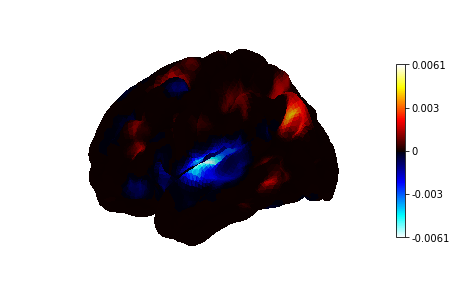

########## LSTM-E600-H300-L1_vs_LSTM-E600-I300-L1 ##########


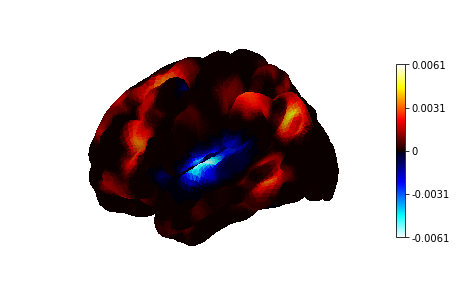

########## LSTM-E600-H300-L1_vs_LSTM-E600-F300-L1 ##########


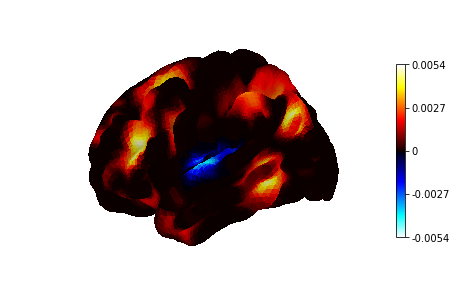

########## LSTM-E600-H300-L1_vs_LSTM-E600-C300-L1 ##########


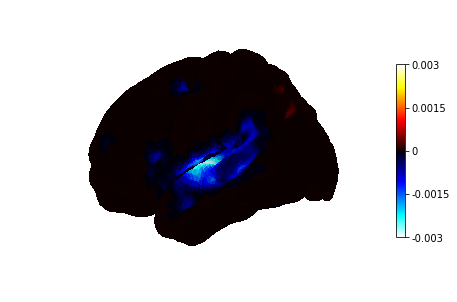

########## LSTM-E600-H300-L1_vs_LSTM-E600-CT300-L1 ##########


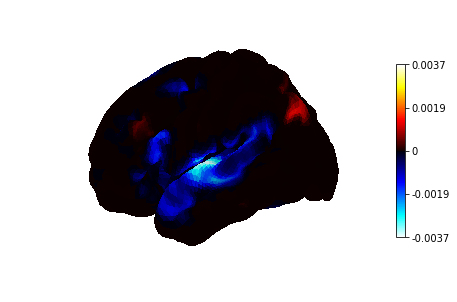

In [46]:
kwargs = {
    'surf_mesh': 'pial_left', # pial_right, infl_left, infl_right
    'surf_mesh_type': 'pial_left',
    'hemi':'left', # right
    'view':'lateral', # medial
    'bg_map': 'sulc_left', # sulc_right
    'bg_on_data':True,
    'darkness':.5
}
for index_comp, comparison in enumerate(comparisons_lstm):
    saving_path = os.path.dirname(paths_lstm[comparison])
    print("#"*10, comparison, "#"*10)
    reporting.plot_img_surf(paths_lstm[comparison], saving_path=None, plot_name=comparison+'_surf', inflated=False, **kwargs)

## BERT vs GPT2

#### Comparison of Bert - Bert_seq - GPT2 with all hidden states of all layers

Here we compute group level maps for each model independently:

In [ ]:
big_model_names = [
    'gpt2_scaled_{}_all-hidden-layers',
    'bert-base-cased_{}_all-hidden-layers',
    'bert-base-cased_sequential_{}_all-hidden-layers'
]

big_model_legends = [
    'GPT2_scaled-H',
    'BERT-H',
    'Bert-seq-H'
]
data_big_models = reporting.get_model_data(big_model_names, language, OUTPUT_PATH)
reporting.check_data(data_big_models, 51)
reporting.compute_t_test_for_model_comparison(
                                        data_big_models, 
                                        smoothing_fwhm=6, 
                                        language='english',
                                        vmax=None,
                                        PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                        )

Here we compute group level maps of the difference between models:

In [ ]:
comparisons_big_models = {
    'BERT-H_vs_GPT2-scaled-H' : ['bert-base-cased_all-hidden-layers', 'gpt2_scaled_all-hidden-layers'],
    'BERT-H_vs_BERT-seq-H' : ['bert-base-cased_all-hidden-layers', 'bert-base-cased_sequential_all-hidden-layers'],
    'GPT2-scaled-H_vs_BERT-seq-H' : ['gpt2_scaled_all-hidden-layers', 'bert-base-cased_sequential_all-hidden-layers'],
}
for comparison in comparisons_big_models:
    imgs_1 = data_big_models[comparisons_big_models[comparison][0]]['R2']
    imgs_2 = data_big_models[comparisons_big_models[comparison][1]]['R2']
    
    names = comparison.split('_vs_')

    reporting.compute_model_contrasts_t_test(
                                    imgs_1,
                                    imgs_2,
                                    names[0], 
                                    names[1], 
                                    analysis_name='',
                                    observed_data='R2',
                                    language='english',
                                    smoothing_fwhm=6,
                                    PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                    )
paths_big_models = {}
for comparison in comparisons_big_models:
    names = comparison.split('_vs_')
    name = '{}-vs-{}_{}'.format(names[0], names[1], '')
    path = os.path.join(PROJECT_PATH, 'derivatives/fMRI/analysis/{}/{}'.format(language, name))
    paths_big_models[comparison] = reporting.fetch_map(path, 'R2_group_fdr_effect')[0]

Surface plots:

In [ ]:
kwargs = {
    'surf_mesh': 'pial_left', # pial_right, infl_left, infl_right
    'surf_mesh_type': 'pial_left',
    'hemi':'left', # right
    'view':'lateral', # medial
    'bg_map': 'sulc_left', # sulc_right
    'bg_on_data':True,
    'darkness':.5
}
for index_comp, comparison in enumerate(comparisons_big_models):
    saving_path = os.path.dirname(paths_big_models[index_comp])
    plot_img_surf(paths_big_models[index_comp], saving_path=None, plot_name=comparison+'_surf', inflated=False, **kwargs):
        

#### Respective layer-wise analysis

In [ ]:
layer_analysis_model_names = [
    'gpt2_scaled',
    'bert-base-cased',
    'bert-base-cased_sequential'
]

In [ ]:
data_layers = get_layers_data(
                        layer_analysis_model_names, 
                        analysis=reporting.get_default_analysis(), 
                        language='english',
                        OUTPUT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/english/'
                        )

In [ ]:
for model_name in data_layers.keys():
    data_tmp_vertical = reporting.get_data_per_roi(
                                    data_layers, 
                                    atlas_maps,
                                    labels,
                                    analysis=reporting.get_default_analysis(),
                                    model_name=model_name,
                                    language='english', 
                                    PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                    )
    mean_big_models = data_tmp_vertical['mean']
    third_quartile_big_models = data_tmp_vertical['third_quartile']
    reporting.vertical_plot(
                    third_quartile_big_models, 
                    x_labels, 
                    'Third_Quartile_R2_per_ROI',
                    save_folder=None, 
                    'R2', 
                    reporting.load_surnames(),
                    big_model_legends, 
                    reporting.load_syntactic_roi(), 
                    reporting.load_language_roi(), 
                    figsize=(9,12), 
                    count=False, 
                    title=None, 
                    ylabel='Regions of interest (ROI)', 
                    xlabel='R2 value', 
                    model_name='Model_comparison'
                    )

#### ROI surface plots 

The following surface plots indicate which layer predicts best which voxel.

In [ ]:
for model_name in data_layers.keys():
    for key in analysis:
        if key != 'Specific-attention-heads':
            maps = []
            for model in data[model_name][key].keys():
                if model == 'models':
                    models = data[model_name][key][model]
                else:
                    name = '_'.join([model_name, model])
                    path = os.path.join(PROJECT_PATH, 'derivatives/fMRI/analysis/{}/{}'.format(language, name))
                    name = 'R2_group_fdr_effect'
                    maps.append(fetch_map(path, name)[0])
            # Small reordering of models so that layers are in increasing order
            if key=='Hidden-layers':
                maps = maps[:2] + maps[5:] + maps[2:5]
                models = models[:2] + models[5:] + models[2:5]
                load = 0
            elif key=='Attention-layers':
                maps = maps[:1] + maps[4:] + maps[1:4]
                models = models[:1] + models[4:] + models[1:4]
                load = 1
            data_tmp = np.stack(masker.transform(map_) for map_ in maps)
            data_tmp = np.argmax(data_tmp, axis=0)
            data_tmp = (data_tmp + load)

            plot_name = "R2-{}-{}".format(model_name, key)

            img = masker.inverse_transform(data_tmp)

            saving_path = os.path.join(PROJECT_PATH, 'derivatives/fMRI/analysis/{}/glass_brains/'.format(language))
            check_folder(saving_path)
            print(plot_name)
            
            kwargs = {
                'surf_mesh': 'pial_left', # pial_right, infl_left, infl_right
                'surf_mesh_type': 'pial_left',
                'hemi':'left', # right
                'view':'lateral', # medial
                'bg_map': 'sulc_left', # sulc_right
                'bg_on_data':True,
                'darkness':.5
            }
            
            reporting.plot_roi_img_surf(img, saving_path=None, plot_name=model_name+'_surf', inflated=False, **kwargs)


#### Layer-wise analysis comparison (vertical plot)

In [ ]:
for model_name in data_layers.keys():
    data_tmp_vertical = reporting.get_data_per_roi(
                                    data_layers, 
                                    atlas_maps,
                                    labels,
                                    analysis=reporting.get_default_analysis(),
                                    model_name=model_name,
                                    language='english', 
                                    PROJECT_PATH='/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/'
                                    )
    mean_big_models = data_tmp_vertical['mean']
    third_quartile_big_models = data_tmp_vertical['third_quartile']
    reporting.vertical_plot(
                    third_quartile_big_models, 
                    x_labels, 
                    'Third_Quartile_R2_per_ROI',
                    save_folder=None, 
                    'R2', 
                    reporting.load_surnames(),
                    big_model_legends, 
                    reporting.load_syntactic_roi(), 
                    reporting.load_language_roi(), 
                    figsize=(9,12), 
                    count=False, 
                    title=None, 
                    ylabel='Regions of interest (ROI)', 
                    xlabel='R2 value', 
                    model_name='Model_comparison'
                    )